In [74]:
# Import necessary python libraries````

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import matplotlib as plt

%matplotlib inline
sns.set(style = "ticks")
rcParams['figure.figsize'] = 15,10  # rcParams for plot rendering attributes
rcParams['font.size'] = 15
rcParams['axes.facecolor'] = 'white' # plott 
plt.rc('lines', linewidth=5, color='r')

In [6]:
# Reading file
churn= pd.read_csv("churn_data_columns.csv")

In [7]:
churn.head()

,Unnamed: 0,State,Account_Length,Area_Code,Phone,International_plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [8]:
churn.replace(' yes',1,inplace=True)
churn.replace(' no',0,inplace=True)

# Separating dependent and independent variables



In [9]:
# separating our independent and dependent variable
X = churn.drop(['Churn','Unnamed: 0','State','Phone'], axis = 1)
y = churn['Churn']

# Splitting the training data

X_train and y_train first used to train the algorithm.
then, X_test is used in that trained algorithms to predict outcomes.
Once we get the outcomes, we compare it with y_test
By comparing the outcome of the model with y_test, we can determine whether our algorithms are performing well or not. As we compare we use confusion matrix and accuracy to determine different aspects of model performance.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state = 42)

# Feature Scaling

In [11]:
headers = X_train.columns 

X_train.head()

,Account_Length,Area_Code,International_plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls
3189,76,510,1,0,0,246.8,110,41.96,206.3,63,17.54,208.4,123,9.38,13.2,5,3.56,0
2646,101,415,0,0,0,232.7,114,39.56,186.4,123,15.84,153.3,122,6.90,11.5,6,3.11,5
506,136,415,0,1,31,143.1,88,24.33,236.6,65,20.11,227.8,120,10.25,11.4,5,3.08,2
393,112,510,0,0,0,217.1,76,36.91,205.2,100,17.44,185.7,91,8.36,9.4,3,2.54,2
1183,154,510,0,1,32,192.3,82,32.69,165.3,134,14.05,205.0,74,9.23,9.0,1,2.43,2


In [12]:
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
X_train = sc.fit_transform(X_train)

## transforming "test_x"
X_test = sc.transform(X_test)

In [13]:
# Saving the file

Our dataset is an imblanced as 85% of customer's churn rate is False. An algoritnm that always predicts that False and achieve good accuracy. We need to make balance one for avoiding biased result. Applying SMOTE Technique.

In [14]:
# Getting imblearn library for applying SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [15]:
# Checking the counts
from collections import Counter
print(Counter(y_train))


Counter({' False.': 3162, ' True.': 531})


In [16]:
# Checking the counts after SMOTE
print(Counter(y_train_smote))


Counter({' True.': 3162, ' False.': 3162})


# Model
 

### Logistic Regression

In [17]:
# Import model libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
#from xgboost import XGBClassifier
#from xgboost import plot_importance
import warnings
warnings.filterwarnings(action='ignore')


In [18]:
## fit the model with "X_train" and "y_train"
## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "X_test" portion of the data (this data was not used to fit the model) to predict model outcome. 
## Once predicted we save that outcome in "pred" variable.
## Then we compare the predicted value( "pred") and actual value("y_test") to see how well our model is performing. 

In [19]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_smote, y_train_smote)
lpredict = lr.predict(X_test)


In [20]:
# Printing the accuracy score
print(classification_report(y_test, lpredict))
print(confusion_matrix(y_test, lpredict))
l = round(accuracy_score(y_true = y_test, y_pred = lpredict) * 100, 2)
print("Accuracy:", l)

              precision    recall  f1-score   support

      False.       0.95      0.74      0.83       799
       True.       0.32      0.78      0.45       125

    accuracy                           0.74       924
   macro avg       0.64      0.76      0.64       924
weighted avg       0.87      0.74      0.78       924

[[591 208]
 [ 28  97]]
Accuracy: 74.46


### Decision Tree

In [21]:
decisiontree = DecisionTreeClassifier(criterion='entropy', random_state = 42)
decisiontree.fit(X_train_smote, y_train_smote)
dpredict = decisiontree.predict(X_test)


In [22]:
# Printing the accuracy score
print(classification_report(y_test, dpredict))
print(confusion_matrix(y_test, dpredict))
d = round(accuracy_score(y_true = y_test, y_pred = dpredict) * 100, 2)
print("Accuracy:", d)

              precision    recall  f1-score   support

      False.       0.96      0.94      0.95       799
       True.       0.66      0.76      0.71       125

    accuracy                           0.91       924
   macro avg       0.81      0.85      0.83       924
weighted avg       0.92      0.91      0.92       924

[[750  49]
 [ 30  95]]
Accuracy: 91.45


### Random Forrest

In [23]:
rf = RandomForestClassifier(random_state = 42, criterion='entropy')
rf.fit(X_train_smote, y_train_smote)
rpredict = rf.predict(X_test)

In [24]:
# Printing the accuracy score
print(classification_report(y_test, rpredict))
print(confusion_matrix(y_test, rpredict))
r = round(accuracy_score(y_true = y_test, y_pred = rpredict) * 100, 2)
print("Accuracy:", r)

              precision    recall  f1-score   support

      False.       0.96      0.97      0.97       799
       True.       0.82      0.71      0.76       125

    accuracy                           0.94       924
   macro avg       0.89      0.84      0.86       924
weighted avg       0.94      0.94      0.94       924

[[779  20]
 [ 36  89]]
Accuracy: 93.94


### Naives Bayes

In [25]:
nb = GaussianNB()
nb.fit(X_train_smote, y_train_smote)
nbpredict = nb.predict(X_test)

In [26]:
# Printing the accuracy score
print(classification_report(y_test, nbpredict))
print(confusion_matrix(y_test, nbpredict))
n = round(accuracy_score(y_true = y_test, y_pred = nbpredict) * 100, 2)
print("Accuracy:", n)

              precision    recall  f1-score   support

      False.       0.95      0.78      0.86       799
       True.       0.35      0.76      0.48       125

    accuracy                           0.78       924
   macro avg       0.65      0.77      0.67       924
weighted avg       0.87      0.78      0.81       924

[[622 177]
 [ 30  95]]
Accuracy: 77.6


### Support Vector Machine

In [27]:
svc = SVC(random_state = 42)
svc.fit(X_train_smote, y_train_smote)
spredict = svc.predict(X_test)

In [28]:
# Printing the accuracy score
print(classification_report(y_test, spredict))
print(confusion_matrix(y_test, spredict))
s = round(accuracy_score(y_true = y_test, y_pred = spredict) * 100, 2)
print("Accuracy:", s)

              precision    recall  f1-score   support

      False.       0.95      0.92      0.94       799
       True.       0.59      0.71      0.64       125

    accuracy                           0.89       924
   macro avg       0.77      0.82      0.79       924
weighted avg       0.90      0.89      0.90       924

[[737  62]
 [ 36  89]]
Accuracy: 89.39


### K Nearest Neighbors

In [29]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_smote, y_train_smote)
kpredict = knn.predict(X_test)

In [30]:
# Printing the accuracy score
print(classification_report(y_test, kpredict))
print(confusion_matrix(y_test, kpredict))
k = round(accuracy_score(y_true = y_test, y_pred = kpredict) * 100, 2)
print("Accuracy:", k)

              precision    recall  f1-score   support

      False.       0.95      0.82      0.88       799
       True.       0.39      0.74      0.51       125

    accuracy                           0.81       924
   macro avg       0.67      0.78      0.70       924
weighted avg       0.88      0.81      0.83       924

[[658 141]
 [ 33  92]]
Accuracy: 81.17


### Stochastic Gradient Boosting

In [31]:
sgd = SGDClassifier(random_state = 42)
sgd.fit(X_train_smote, y_train_smote)
sgpredict = sgd.predict(X_test)

In [32]:
# Printing the accuracy score
print(classification_report(y_test, sgpredict))
print(confusion_matrix(y_test, sgpredict))
sg = round(accuracy_score(y_true = y_test, y_pred = sgpredict) * 100, 2)
print("Accuracy:", sg)

              precision    recall  f1-score   support

      False.       0.95      0.73      0.82       799
       True.       0.30      0.74      0.43       125

    accuracy                           0.73       924
   macro avg       0.62      0.74      0.62       924
weighted avg       0.86      0.73      0.77       924

[[581 218]
 [ 32  93]]
Accuracy: 72.94


### Gradient Boosting Classifier

In [33]:
gbk = GradientBoostingClassifier(random_state = 42)
gbk.fit(X_train_smote, y_train_smote)
gbpredict = gbk.predict(X_test)

In [34]:
# Printing the accuracy score
print(classification_report(y_test, gbpredict))
print(confusion_matrix(y_test, gbpredict))
gb = round(accuracy_score(y_true = y_test, y_pred = gbpredict) * 100, 2)
print("Accuracy:", gb)

              precision    recall  f1-score   support

      False.       0.97      0.96      0.97       799
       True.       0.78      0.78      0.78       125

    accuracy                           0.94       924
   macro avg       0.87      0.87      0.87       924
weighted avg       0.94      0.94      0.94       924

[[771  28]
 [ 27  98]]
Accuracy: 94.05


In [37]:
print("Logistic Regression - Accuracy:", l)
print("Gradient Boosting Classifier - Accuracy:", gb)
print("Random Forest - Accuracy:", r)
print("Decision Tree - Accuracy:", d)
print("KNN - Accuracy:", k)
print("Support Vector Machines - Accuracy:", s)
print("Naive Bayes - Accuracy:", n)
print("Stochastic Gradient Descent - Accuracy:", sg)

Logistic Regression - Accuracy: 74.46
Gradient Boosting Classifier - Accuracy: 94.05
Random Forest - Accuracy: 93.94
Decision Tree - Accuracy: 91.45
KNN - Accuracy: 81.17
Support Vector Machines - Accuracy: 89.39
Naive Bayes - Accuracy: 77.6
Stochastic Gradient Descent - Accuracy: 72.94


Random Forest came as a best model among all the models followed by Gradient Boosting. Tuning the Random Forest model.

# Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv = 20, scoring = 'accuracy')
print(scores)
print(scores.mean())

[0.94396552 0.96103896 0.95670996 0.94372294 0.92207792 0.93506494
 0.96103896 0.94805195 0.96536797 0.93506494 0.93506494 0.91774892
 0.94805195 0.95670996 0.95238095 0.93073593 0.94347826 0.93043478
 0.95652174 0.96956522]
0.9456398343036273


# Hyperparameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

params= {'n_estimators':np.arange(1,200),
         'random_state': np.arange(1,200),
         'criterion': ['entropy','gini'],
          'max_features':['auto','sqrt','log2'],
         'bootstrap':[True, False]
          }
model = RandomizedSearchCV(RandomForestClassifier(),params)
model.fit(X_train_smote, y_train_smote)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [40]:
model.best_score_

0.9641049968374447

In [41]:
model.best_params_

{'random_state': 41,
 'n_estimators': 104,
 'max_features': 'sqrt',
 'criterion': 'entropy',
 'bootstrap': False}

In [42]:
model.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=104,
                       n_jobs=None, oob_score=False, random_state=41, verbose=0,
                       warm_start=False)

In [61]:
# Checking ROC 
df = model.predict_proba(X_test)

array([[0.92307692, 0.07692308],
       [0.99038462, 0.00961538],
       [0.96153846, 0.03846154],
       ...,
       [0.875     , 0.125     ],
       [0.625     , 0.375     ],
       [0.94230769, 0.05769231]])

# Our AUC score is 92% from the above model. 

# Feature vs Influence on model

In [51]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [52]:
feature_importances

,importance
CustServ_Calls,0.134663
Day_Mins,0.128009
Day_Charge,0.096380
International_plan,0.094475
International_Calls,0.075598
Area_Code,0.058440
Eve_Charge,0.051527
Eve_Mins,0.051246
International_Charge,0.039221
Night_Charge,0.038068


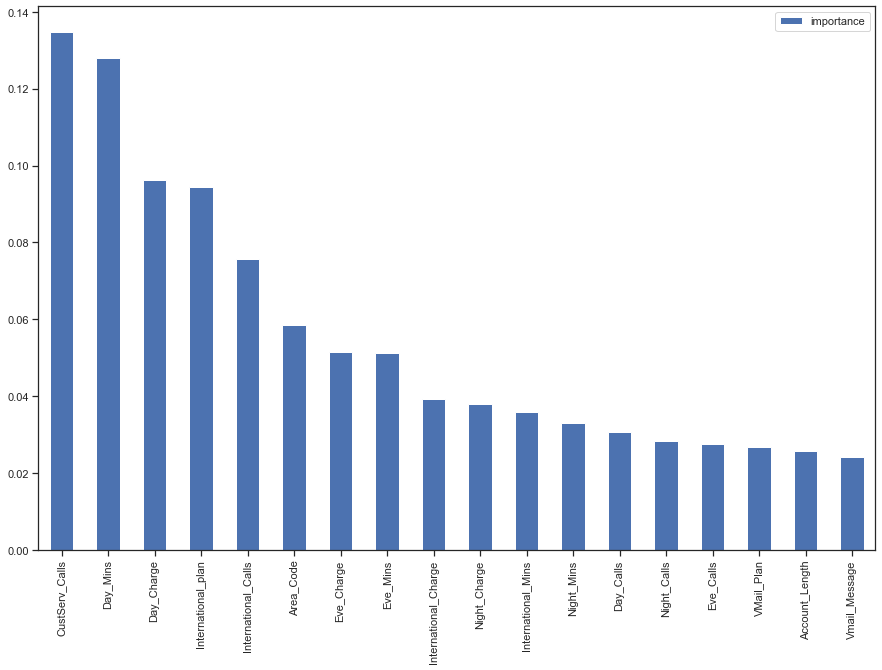

In [73]:
feature_importances.sort_values('importance', ascending=False).plot(kind = 'bar')

In [ ]:
from sklearn.externals import joblib

In [ ]:
# Dump the Model
joblib.dump(model,'Telcomchurn.ml')